In [1]:
from pandas import *
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats 
from s import Sample, HTable
from s.utils import table, printf, load_styles
load_styles()

df = pandas.read_csv('data_matstat_K5.csv', sep=';')
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


# 1. Описательные характеристики

## 1.1. Выборочные характеристики
Анализируемый признак 1 – C7 (Grams of fat consumed per day)

Анализируемый признак 2 – C9 (Number of alcoholic drinks consumed per week)

Анализируемый признак 3 – C12 (Dietary retinol consumed (mcg per day))

In [2]:
TASK_1_1 = ['C7', 'C9', 'C12']
def print1_table(csv_table, task):
    all_data = [csv_table[task[0]], csv_table[task[1]], csv_table[task[2]]]
    all_np_data = [np.array(data) for data in all_data]
    n_sample = ['Объём выборки', *[len(data) for data in all_data]]
    mean = ['Среднее', *[round(data.mean(), 4) for data in all_data]]
    var = ['Дисперсия', *[round(data.var(), 4) for data in all_data]]
    std = ['Среднеквадратическое отклонение', *[round(data.std(), 4) for data in all_data]]
    skew = ['Коэффициент асимметрии', *[round(stats.skew(data), 4) for data in all_data]]
    kurtosis = ['Эксцесс', *[round(stats.kurtosis(data), 4) for data in all_data]]
    table(["Выборочная хар-ка", task[0], task[1], task[2]],
          [n_sample,
           mean,
           var,
           std,
           skew,
           kurtosis])
print1_table(df, TASK_1_1)

Выборочная хар-ка,C7,C9,C12
Объём выборки,315,315,315
Среднее,77.0333,3.2794,832.7143
Дисперсия,1144.4312,151.8534,347261.5614
Среднеквадратическое отклонение,33.8294,12.3229,589.289
Коэффициент асимметрии,1.099,13.7571,4.4525
Эксцесс,1.9648,217.8151,37.4471


## 1.2. Группировка и гистограммы частот
Анализируемый признак – C7 (Grams of fat consumed per day)

Объём выборки – 315

а) Выбрать число групп


Число групп,Обоснование выбора числа групп,Ширина интервалов
9,Формула Стерджесса,24.6111


б) Построить таблицу частот


Номер интервала,Нижняя граница,Верхняя граница,Частота,Относит. частота,Накопл. частота,Относит. накопл. частота
1,14.4,39.0111,33,0.1048,33,0.1048
2,39.0111,63.6222,100,0.3175,133,0.4222
3,63.6222,88.2334,84,0.2667,217,0.6889
4,88.2334,112.8445,54,0.1714,271,0.8603
5,112.8445,137.4556,29,0.0921,300,0.9524
6,137.4556,162.0667,6,0.019,306,0.9714
7,162.0667,186.6779,6,0.019,312,0.9905
8,186.6779,211.289,2,0.0063,314,0.9968
9,211.289,235.9001,1,0.0032,315,1.0


в) Построить гистограммы частот и полигоны частот


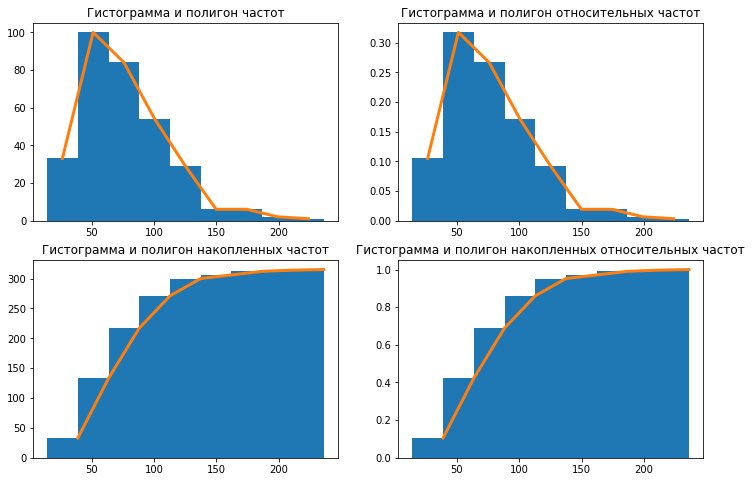

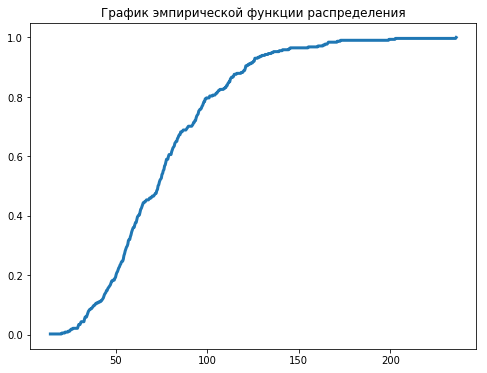

In [3]:
TASK_1_2 = ['C7']
def print1_2_table(csv, task):
    np_first = np.array(csv)
    n = len(np_first)
    k = math.floor(1 + math.log(n, 2))
    begin = min(np_first)
    end = max(np_first) + 0.0001
    h = (end - begin) / k
    print('а) Выбрать число групп')
    table(['Число групп', 'Обоснование выбора числа групп', 'Ширина интервалов'],
          [[k, 'Формула Стерджесса', round(h, 4)]])
    print('б) Построить таблицу частот')
    rows = []
    cur_freq = 0
    bins_list = [begin]
    polygon_x_list = []
    cum_polygon_x_list = []
    polygon_y_list = []
    cum_polygon_y_list = []
    for i in range(1, k + 1):
        local_begin = round(begin + (i - 1) * h, 4)
        local_end = round(begin + i * h, 4)
        cum_polygon_x_list.append(local_end)
        polygon_x_list.append((local_begin + local_end) / 2)
        bins_list.append(local_end)
        freq = len(list(filter(lambda x: local_begin <= x < local_end, np_first)))
        polygon_y_list.append(freq)
        cur_freq += freq
        cum_polygon_y_list.append(cur_freq)
        cur_row = [i, local_begin, local_end, freq, round(freq / n, 4), cur_freq, round(cur_freq / n, 4)]
        rows.append(cur_row)
    table(['Номер интервала', 'Нижняя граница', 'Верхняя граница', 'Частота', 'Относит. частота', 'Накопл. частота', 'Относит. накопл. частота'],
          rows)
    print('в) Построить гистограммы частот и полигоны частот')
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    picture1 = ax[0][0]
    picture1.hist(np_first, bins=bins_list)
    picture1.plot(polygon_x_list, polygon_y_list, lw=3)
    picture1.set_title('Гистограмма и полигон частот', fontsize=12)
    picture2 = ax[0][1]
    picture2.hist(np_first, bins=bins_list, weights=[1 / n for _ in range(n)])
    picture2.plot(polygon_x_list, [freq / n for freq in polygon_y_list], lw=3)
    picture2.set_title('Гистограмма и полигон относительных частот', fontsize=12)
    picture3 = ax[1][0]
    picture3.hist(np_first, bins=bins_list, cumulative=True)
    picture3.plot(cum_polygon_x_list, cum_polygon_y_list, lw=3)
    picture3.set_title('Гистограмма и полигон накопленных частот', fontsize=12)
    picture4 = ax[1][1]
    picture4.hist(np_first, bins=bins_list, cumulative=True, weights=[1 / n for _ in range(n)])
    picture4.plot(cum_polygon_x_list, [freq / n for freq in cum_polygon_y_list], lw=3)
    picture4.set_title('Гистограмма и полигон накопленных относительных частот', fontsize=12)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ecdf = ECDF(np_first)
    x_list = np.linspace(begin, end, n * 2)
    y_list = ecdf(x_list)
    ax.plot(x_list, y_list,  lw=3)
    ax.set_title('График эмпирической функции распределения', fontsize=12)
        
    
print1_2_table(df[TASK_1_2[0]], TASK_1_2)

# 2. Интервальные оценки
## 2.1. Доверительные интервалы для мат. ожидания
Анализируемый признак – C7 (Grams of fat consumed per day)

Объём выборки – 315

Оцениваемый параметр – мат. ожидание

In [4]:
print('б) Рассчитать доверительные интервалы')
def mean_confidence_interval(data, alpha):
    n = len(data)
    mean = data.mean()
    h = data.std(ddof=1) * stats.t.ppf(1 - alpha / 2, n-1) / np.sqrt(n)
    return round(mean - h, 4), round(mean + h, 4)

def print_2_1(csv, task):
    np_first = np.array(csv)
    l1, r1 = mean_confidence_interval(np_first, 0.01)
    l5, r5 = mean_confidence_interval(np_first, 0.05)
    l10, r10 = mean_confidence_interval(np_first, 0.1)
    table(['Граница доверительного интервала', '$\\alpha = 0.01$', '$\\alpha = 0.05$', '$\\alpha = 0.1$'],
          [['Нижняя граница', l1, l5, l10],
           ['Верхняя граница', r1, r5, r10]])

TASK_2_1 = ['C7']
print_2_1(df[TASK_2_1[0]], TASK_2_1)

б) Рассчитать доверительные интервалы


Граница доверительного интервала,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Нижняя граница,72.0936,73.283,73.8888
Верхняя граница,81.9731,80.7836,80.1778


## 2.2. Доверительные интервалы для дисперсии
Анализируемый признак  – C7 (Grams of fat consumed per day)

Объём выборки – 315

Оцениваемый параметр – дисперсия

In [5]:
print('б) Рассчитать доверительные интервалы')
def var_confidence_interval(data, alpha):
    n = len(data)
    var = data.std(ddof=1) ** 2
    l = (n - 1) * var / stats.chi2.ppf(1 - alpha / 2, n-1)
    r = (n - 1) * var / stats.chi2.ppf(alpha / 2, n-1)
    return round(l, 4), round(r, 4)

def print_2_2(csv, task):
    np_first = np.array(csv)
    l1, r1 = var_confidence_interval(np_first, 0.01)
    l5, r5 = var_confidence_interval(np_first, 0.05)
    l10, r10 = var_confidence_interval(np_first, 0.1)
    table(['Граница доверительного интервала', '$\\alpha = 0.01$', '$\\alpha = 0.05$', '$\\alpha = 0.1$'],
          [['Нижняя граница', l1, l5, l10],
           ['Верхняя граница', r1, r5, r10]])

TASK_2_2 = ['C7']
print_2_2(df[TASK_2_1[0]], TASK_2_1)

б) Рассчитать доверительные интервалы


Граница доверительного интервала,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Нижняя граница,939.9721,984.5714,1008.4927
Верхняя граница,1419.1945,1346.8726,1311.7503


# 2.3. Доверительные интервалы для разности мат. ожиданий
Анализируемый признак 1 – C13 (Plasma beta-carotene (ng/ml))

Анализируемый признак 2 – C14 (Plasma Retinol (ng/ml))

Объёмы выборок – 315

Оцениваемый параметр – разность мат. ожиданий 

In [6]:
print('б) Рассчитать доверительные интервалы')
def mean_diff_confidence_interval(data1, data2, alpha):
    n1 = len(data1)
    n2 = len(data2)
    mean_1 = data1.mean()
    mean_2 = data2.mean()
    var1 = data1.var(ddof=1)
    var2 = data2.var(ddof=1)
    S = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    h = stats.t.ppf(1 - alpha / 2, n1 + n2 - 2) * S * np.sqrt(1 / n1 + 1 / n2)
    return round(abs(mean_1 - mean_2) - h, 4), round(abs(mean_1 - mean_2) + h, 4)

def print_2_3(csv1, csv2):
    np_first = np.array(csv1)
    np_second = np.array(csv2)
    l1, r1 = mean_diff_confidence_interval(np_first, np_second, 0.01)
    l5, r5 = mean_diff_confidence_interval(np_first, np_second, 0.05)
    l10, r10 = mean_diff_confidence_interval(np_first, np_second, 0.1)
    table(['Граница доверительного интервала', '$\\alpha = 0.01$', '$\\alpha = 0.05$', '$\\alpha = 0.1$'],
          [['Нижняя граница', l1, l5, l10],
           ['Верхняя граница', r1, r5, r10]])

TASK_2_3 = ['C13', 'C14']
print_2_3(df[TASK_2_3[0]], df[TASK_2_3[1]])

б) Рассчитать доверительные интервалы


Граница доверительного интервала,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Нижняя граница,372.4701,382.1705,387.1224
Верхняя граница,453.3267,443.6263,438.6744


## 2.4. Доверительные интервалы для отношения дисперсий
Анализируемый признак 1 – C13 (Plasma beta-carotene (ng/ml))

Анализируемый признак 2 – C14 (Plasma Retinol (ng/ml))

Объёмы выборок – 315

Оцениваемый параметр – отношение дисперсий

In [7]:
print('б) Рассчитать доверительные интервалы')
def var_diff_confidence_interval(data1, data2, alpha):
    n1 = len(data1)
    n2 = len(data2)
    var1 = data1.var(ddof=1)
    var2 = data2.var(ddof=1)
    f_a_2 = stats.f.ppf(alpha / 2, n2 - 1, n1 - 1)
    f_1_a_2 = stats.f.ppf(1 - alpha / 2, n2 - 1, n1 - 1)
    return round(var1 / var2 * f_a_2, 4), round(var1 / var2 * f_1_a_2, 4)

def print_2_4(csv1, csv2):
    np_first = np.array(csv1)
    np_second = np.array(csv2)
    l1, r1 = var_diff_confidence_interval(np_first, np_second, 0.01)
    l5, r5 = var_diff_confidence_interval(np_first, np_second, 0.05)
    l10, r10 = var_diff_confidence_interval(np_first, np_second, 0.1)
    table(['Граница доверительного интервала', '$\\alpha = 0.01$', '$\\alpha = 0.05$', '$\\alpha = 0.1$'],
          [['Нижняя граница', l1, l5, l10],
           ['Верхняя граница', r1, r5, r10]])

TASK_2_4 = ['C13', 'C14']
print_2_4(df[TASK_2_4[0]], df[TASK_2_4[1]])

б) Рассчитать доверительные интервалы


Граница доверительного интервала,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Нижняя граница,0.5734,0.6149,0.6372
Верхняя граница,1.0271,0.9578,0.9243


# 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях
## 3.1. Проверка статистических гипотез о математических ожиданиях
Анализируемый признак – C7 (Grams of fat consumed per day)

Объём выборки – 315

Статистическая гипотеза – $H_0: m = m_0$ 

$H': m \neq m_0$

In [8]:
def criterion_t_test_row(data, m0, alpha=0.1):
    mean = data.mean()
    s = data.std(ddof=1)
    n = len(data)
    z = (mean - m0) / s * np.sqrt(n)
    t_quantile = stats.t.ppf(1 - alpha / 2, n - 1)
    decision = 'H0' if abs(z) < t_quantile else "H'"
    l_p_value = stats.t.cdf(z, n - 1)
    p_value = 2 * min(l_p_value, 1 - l_p_value)
    return m0, alpha, round(z, 4), round(p_value, 4), decision

def print_3_1(csv):
    np_first = np.array(csv)
    table(['$m_0$', 'Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'], 
          [criterion_t_test_row(np_first, 73, alpha=0.1),
           criterion_t_test_row(np_first, 75, alpha=0.1),
           criterion_t_test_row(np_first, 77, alpha=0.1),])

TASK_3_1 = ['C7']
print_3_1(df[TASK_3_1[0]])

$m_0$,Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
73,0.1,2.116,0.0351,H'
75,0.1,1.0668,0.2869,H0
77,0.1,0.0175,0.9861,H0


In [9]:
def criterion_chi_squared_test_row(data, d0, alpha=0.1):
    S = data.var(ddof=1)
    n = len(data)
    z = (n - 1) * S / d0 ** 2
    chi2_l_quantile = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_r_quantile = stats.chi2.ppf(1 - alpha / 2, n - 1)
    l_p_value = stats.chi2.cdf(z, n - 1)
    p_value = 2 * min(l_p_value, 1 - l_p_value)
    decision = 'H0' if chi2_l_quantile < z < chi2_r_quantile else "H'"
    return d0, alpha, round(z, 4), round(p_value, 4), decision

def print_3_2(csv):
    np_first = np.array(csv)
    table(['$\sigma_0$', 'Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
          [criterion_chi_squared_test_row(np_first, 31.6, alpha=0.1),
           criterion_chi_squared_test_row(np_first, 33.16, alpha=0.1),
           criterion_chi_squared_test_row(np_first, 34.6, alpha=0.1)])

TASK_3_2 = ['C7']
print_3_2(df[TASK_3_1[0]])

$\sigma_0$,Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
31.6,0.1,359.8696,0.076,H'
33.16,0.1,326.8062,0.5956,H0
34.6,0.1,300.1699,0.5937,H0


## 3.3. Проверка статистических гипотез о равенстве математических ожиданий
Анализируемый признак 1 – C13 (Plasma beta-carotene (ng/ml))

Анализируемый признак 2 – C14 (Plasma Retinol (ng/ml))

Объёмы выборок – 315

Статистическая гипотеза – дана

In [10]:
def criterion_welchs_t_test_row(data1, data2, alpha=0.1):
    n1 = len(data1)
    n2 = len(data2)
    mean1 = data1.mean()
    mean2 = data2.mean()
    S1 = data1.var(ddof=1)
    S2 = data2.var(ddof=1)
    k = ((S1 / n1) / (S1 / n1 + S2 / n2)) ** 2 / (n1 - 1)
    k += ((S2 / n1) / (S1 / n1 + S2 / n2)) ** 2 / (n2 - 1)
    z = abs(mean1 - mean2) / (np.sqrt(S1 / n1 + S2 / n2))
    t_quantile = stats.t.ppf(1 - alpha / 2, math.floor(1 / k))
    l_p_value = stats.t.cdf(z, math.floor(1 / k))
    p_value = 2 * min(l_p_value, 1 - l_p_value)
    dessision = 'H0' if abs(z) < t_quantile else "H'"
    return alpha, round(z, 4), p_value, dessision

def print_3_3(csv1, csv2):
    np_first = np.array(csv1)
    np_second = np.array(csv2)
    table(['Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
          [criterion_welchs_t_test_row(np_first, np_second, alpha=0.01),
           criterion_welchs_t_test_row(np_first, np_second, alpha=0.05),
           criterion_welchs_t_test_row(np_first, np_second, alpha=0.1),])

TASK_3_3 = ['C13', 'C14']
print_3_3(df[TASK_3_3[0]], df[TASK_3_3[1]])

Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,26.3874,0.0,H'
0.05,26.3874,0.0,H'
0.1,26.3874,0.0,H'


## 3.4. Проверка статистических гипотез о равенстве дисперсий
Анализируемый признак 1 – C13 (Plasma beta-carotene (ng/ml))

Анализируемый признак 2 – C14 (Plasma Retinol (ng/ml))

Объёмы выборок – 315

Статистическая гипотеза – дана

In [11]:
def criterion_two_sample_f_test_row(data1, data2, alpha=0.1):
    n1 = len(data1)
    n2 = len(data2)
    S1 = data1.var(ddof=1)
    S2 = data2.var(ddof=1)
    z = S1 / S2
    f_l_quantile = stats.f.ppf(alpha / 2, n1 - 1, n2 - 1)
    f_r_quantile = stats.f.ppf(1 - alpha / 2, n1 - 1, n2 - 1)
    l_p_value = stats.f.cdf(z, n1 - 1, n2 - 1)
    p_value = 2 * min(l_p_value, 1 - l_p_value)
    dessision = 'H0' if f_l_quantile < abs(z) < f_r_quantile else "H'"
    return alpha, round(z, 4), round(p_value, 4), dessision

def print_3_4(csv1, csv2):
    np_first = np.array(csv1)
    np_second = np.array(csv2)
    table(['Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
          [criterion_two_sample_f_test_row(np_first, np_second, alpha=0.01),
           criterion_two_sample_f_test_row(np_first, np_second, alpha=0.05),
           criterion_two_sample_f_test_row(np_first, np_second, alpha=0.1),])

TASK_3_4 = ['C13', 'C14']
print_3_4(df[TASK_3_4[0]], df[TASK_3_4[1]])

Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,0.7674,0.0193,H0
0.05,0.7674,0.0193,H'
0.1,0.7674,0.0193,H'


## 4. Критерии согласия
Анализируемый признак – C7 (Grams of fat consumed per day)

Объём выборки – 315

## 4.1. Критерий хи-квадрат
Теоретическое распределение – нормальное.

Статистическая гипотеза – H_0:F(x)~N

б) Выбрать число групп


Число групп,Обоснование выбора числа групп,Ширина интервалов
9,Формула Стерджесса,24.6111


в) Построить таблицу частот


Номер интервала,Нижняя граница,Верхняя граница,Частота,Относит. частота,Накопл. частота,Относит. накопл. частота,Вероятность попадания в интервал при условии истинности основной гипотезы
1,14.4,39.0111,33,0.1048,33,0.1048,0.1301
2,39.0111,63.6222,100,0.3175,133,0.4222,0.2155
3,63.6222,88.2334,84,0.2667,217,0.6889,0.2842
4,88.2334,112.8445,54,0.1714,271,0.8603,0.2256
5,112.8445,137.4556,29,0.0921,300,0.9524,0.1077
6,137.4556,162.0667,6,0.019,306,0.9714,0.0309
7,162.0667,186.6779,6,0.019,312,0.9905,0.0053
8,186.6779,211.289,2,0.0063,314,0.9968,0.0005
9,211.289,235.9001,1,0.0032,315,1.0,0.0


г) Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике


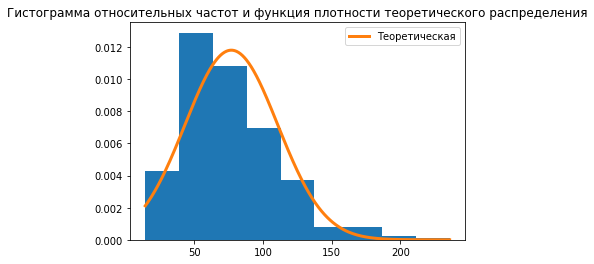

д) Проверить статистические гипотезы


Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,141.9568,0.0,H1
0.05,141.9568,0.0,H1
0.1,141.9568,0.0,H1


In [12]:
def pirson_test(data, bins, probabilities, alpha = 0.1):
    hist_real, _ = np.histogram(data, bins=bins)
    hist_expected = np.array(probabilities) * len(data)
    z = np.sum(
            (hist_real - hist_expected) ** 2 / hist_expected
        )
    criterion_dist = stats.chi2((len(bins) - 1) - 2 - 1)
    p_value = 1 - criterion_dist.cdf(z)
    critical_v = criterion_dist.ppf(1 - alpha)
    decision = 'H0' if z < critical_v else 'H1'
    return alpha, round(z, 4), p_value, decision

def print4_1_table(csv):
    np_first = np.array(csv)
    n = len(np_first)
    k = math.floor(1 + math.log(n, 2))
    begin = min(np_first)
    end = max(np_first) + 0.0001
    h = (end - begin) / k
    print('б) Выбрать число групп')
    table(['Число групп', 'Обоснование выбора числа групп', 'Ширина интервалов'],
          [[k, 'Формула Стерджесса', round(h, 4)]])
    rows = []
    cur_freq = 0
    bins_list = [begin]
    polygon_x_list = []
    cum_polygon_x_list = []
    polygon_y_list = []
    cum_polygon_y_list = []
    probabilities = []
    N = stats.norm(np_first.mean(), np_first.std())
    print('в) Построить таблицу частот')
    for i in range(1, k + 1):
        local_begin = round(begin + (i - 1) * h, 4)
        local_end = round(begin + i * h, 4)
        if i == 1:
            probabilities.append(N.cdf(local_end))
        elif i == k:
            probabilities.append(1 - N.cdf(local_begin))
        else:
            probabilities.append(N.cdf(local_end) - N.cdf(local_begin))
        cum_polygon_x_list.append(local_end)
        polygon_x_list.append((local_begin + local_end) / 2)
        bins_list.append(local_end)
        freq = len(list(filter(lambda x: local_begin <= x < local_end, np_first)))
        polygon_y_list.append(freq)
        cur_freq += freq
        cum_polygon_y_list.append(cur_freq)
        cur_row = [i, local_begin, local_end, freq, round(freq / n, 4), cur_freq, round(cur_freq / n, 4), round(probabilities[-1], 4)]
        rows.append(cur_row)
    table(['Номер интервала', 'Нижняя граница', 'Верхняя граница', 'Частота', 'Относит. частота', 'Накопл. частота', 'Относит. накопл. частота', 
           'Вероятность попадания в интервал при условии истинности основной гипотезы'],
          rows)
    
    print('г) Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике')
    plt.hist(np_first, bins=9, density=True)
    x = np.linspace(min(np_first), max(np_first), 2*len(np_first))
    y = N.pdf(x)
    plt.plot(x, y, label='Теоретическая', linewidth=3)
    plt.title('Гистограмма относительных частот и функция плотности теоретического распределения', fontsize=12)
    plt.legend(loc='upper right')
    plt.show()
    
    print('д) Проверить статистические гипотезы')
    table(
        ['Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
        [
            pirson_test(np_first, bins_list, probabilities, 0.01),
            pirson_test(np_first, bins_list, probabilities, 0.05),
            pirson_test(np_first, bins_list, probabilities, 0.1)
        ]
    )         

TASK_4_1 = ['C7']
print4_1_table(df[TASK_4_1[0]])

## 4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса (критерий Харке-Бера)

Статистическая гипотеза – H_0:F(x)~N

In [13]:
print('б) Проверить статистические гипотезы')
def Jarque_Bera_test(first, alpha_list=[0.01, 0.05, 0.1]):
    x = np.array(df[first])
    s = stats.skew(x)
    k = stats.kurtosis(x)
    n = len(x)
    z = n * (s ** 2 / 6 + (k - 3) ** 2 / 24)
    dist = stats.chi2(2)
    l_p_value = 1. - dist.cdf(z)
    p_value = 2 * min(l_p_value, 1 - l_p_value)
    rows = []
    for al in alpha_list:
        critical_l_v = dist.ppf(al / 2)
        critical_r_v = dist.ppf(1 - al / 2)
        decision = 'H0' if critical_l_v < z < critical_r_v else 'H1'
        rows.append([al, round(z, 4), p_value, decision])
    table(
        ['Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
        rows
    ) 
    
TASK_4_2 = ['C7']
Jarque_Bera_test(TASK_4_2[0])

б) Проверить статистические гипотезы


Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,77.4744,0.0,H1
0.05,77.4744,0.0,H1
0.1,77.4744,0.0,H1


# 5. Проверка однородности выборок
Анализируемый признак 1 – C13 (Plasma beta-carotene (ng/ml))

Анализируемый признак 2 – C14 (Plasma Retinol (ng/ml))

Объёмы выборок – 315

## 5.1 Критерий знаков
Статистическая гипотеза –  дана

In [14]:
alpha = [0.01, 0.05, 0.1]

print('б) Проверить статистические гипотезы')

def sign_test(first, second):
    x = df[first]
    y = df[second]
    k = x - y
    k = np.array(list(filter(lambda x: x != 0, k)))
    k_positive = len(list(filter(lambda x: x > 0, k)))
    n = len(k)
    z = 2 * (k_positive - n/2) / np.sqrt(n)
    rows = []
    for al in alpha:
        critical_value = stats.norm.ppf(1 - al / 2, 0 ,1)
        p_left = stats.norm.cdf(z, 0 ,1)
        p_value = min(p_left, 1-p_left)
        decision = 'H0' if np.abs(z) < critical_value else 'H1'
        rows.append([al,round(z, 4), round(p_value, 4),decision])
    table(
        ['Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
        rows
    ) 


TASK_5 = ['C13', 'C14']
sign_test(TASK_5[0], TASK_5[1])

б) Проверить статистические гипотезы


Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,-16.5087,0.0,H1
0.05,-16.5087,0.0,H1
0.1,-16.5087,0.0,H1


## 5.2. Критерий хи-квадрат
Статистическая гипотеза – $H_0: F_1(x)=F_2(x)$

In [15]:
def freq(x, local_begin, local_end):
    return len(list(filter(lambda t: t >= local_begin and t < local_end, list(x))))

def print_5_2(first , second):
    np_first = np.array(df[first])
    np_second = np.array(df[second])
    begin = min(min(np_first), min(np_second))
    end = max(max(np_first), max(np_second)) + 0.1
    n = len(np_first)
    k = int(1 + math.log(n, 2))
    h =  (end - begin)/ k
    print('б) Выбрать число групп')
    table(
        ['Число групп', 'Обоснования выбора числа групп', 'Ширина интервалов'],
        [
            [k, "формула Стерджесса", round(h, 4)]
        ]
    )
    rows = []
    bins = []
    for i in range(1, k + 1):
        local_begin = begin + (i-1)*h
        bins.append(local_begin)
        local_end   = begin + i*h
        freq1 = freq(np_first, local_begin, local_end)
        freq2 = freq(np_second, local_begin, local_end)
        rows.append([i, round(local_begin, 4), round(local_end, 4), freq1, freq2, round(freq1/n, 4), round(freq2/n, 4)])
    bins.append(local_end)
    print('в) Построить таблицу частот')
    table(
        ['Номер интервала', 'Нижняя граница', 'Верхняя граница', 'Частота признка1', 'Частота признка2', 'Относит. частота1', 'Относит. частота2'],
        rows
    )
    return bins
bins = print_5_2(TASK_5[0], TASK_5[1])

б) Выбрать число групп


Число групп,Обоснования выбора числа групп,Ширина интервалов
9,формула Стерджесса,191.9


в) Построить таблицу частот


Номер интервала,Нижняя граница,Верхняя граница,Частота признка1,Частота признка2,Относит. частота1,Относит. частота2
1,0.0,191.9,215,2,0.6825,0.0063
2,191.9,383.8,73,28,0.2317,0.0889
3,383.8,575.7,17,134,0.054,0.4254
4,575.7,767.6,2,92,0.0063,0.2921
5,767.6,959.5,3,45,0.0095,0.1429
6,959.5,1151.4,2,8,0.0063,0.0254
7,1151.4,1343.3,1,3,0.0032,0.0095
8,1343.3,1535.2,2,2,0.0063,0.0063
9,1535.2,1727.1,0,1,0.0,0.0032


г) Построить гистограммы относительных частот на одном графике


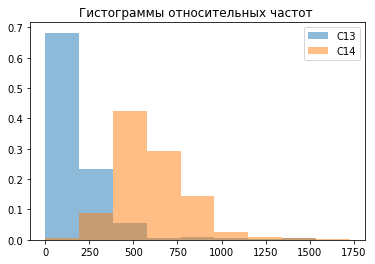

In [16]:
print('г) Построить гистограммы относительных частот на одном графике')
def hist_5_2(first, second, bins_list):
    x = np.array(df[first])
    y = np.array(df[second])
    plt.hist(x, bins=bins_list, alpha=0.5, label=first, weights=np.zeros_like(x) + 1. / x.size)
    plt.hist(y, bins=bins_list, alpha=0.5, label=second, weights=np.zeros_like(y) + 1. / y.size)
    plt.title('Гистограммы относительных частот ')
    plt.legend(loc='upper right')
    plt.show()
    
hist_5_2(TASK_5[0], TASK_5[1], bins)

In [17]:
print('д) Проверить статистические гипотезы')
def pirson_2smpl_test(first, second, bins):
    dist = stats.chi2((len(bins) - 1) - 1)
    x = np.array(df[first])
    y = np.array(df[second])
    hist1, _ = np.histogram(x, bins=bins)
    hist2, _ = np.histogram(y, bins=bins)
    n1 = len(x)
    n2 = len(y)
    z = n1 * n2 * np.sum(
            1. / (hist1 + hist2) * (hist1 / n1 - hist2 / n2) ** 2
        )
    p_v = 1 - dist.cdf(z)
    rows = []
    for al in alpha:
        critical_v = dist.ppf(1 - al)
        decision = 'H0' if z < critical_v else 'H1'
        rows.append([al, round(z, 4), p_v, decision])
    table(
        ['Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
        rows
    )    

pirson_2smpl_test(TASK_5[0], TASK_5[1], bins)

д) Проверить статистические гипотезы


Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,448.2991,0.0,H1
0.05,448.2991,0.0,H1
0.1,448.2991,0.0,H1


# 6. Таблицы сопряжённости

Факторный признак x – C2(Sex)

Результативный признак y – C3(Smoking status)

Объёмы выборок –315

Статистическая гипотеза – в Word

In [18]:
def crosstab(first, second):
    x = df[first]
    x_labels = df.groupby(first).count().index
    y_labels = df.groupby(second).count().index
    
    rows =[]
    column_sum = [0 for i in range(len(y_labels)+1)] 
    for i in x_labels:
        row = [i]
        for j in range(len(y_labels)):
            count = x[(df[first] == i) & (df[second] == y_labels[j])].count()
            column_sum[j]+=count
            row.append(count)
        row_sum = sum(row[1:])
        row.append(row_sum)
        column_sum[j+1]+=row_sum
        rows.append(row)
    final_row =  ['$\sum$']
    final_row.extend(column_sum)
    rows.append(final_row)
    
    first_row = ['x \ y']
    first_row.extend(y_labels)
    first_row.append('$\sum$')
    
    table(
        first_row,
        rows
    ) 
    
    for l in rows:
        l.pop(0)
    return np.array(rows)

TASK_6 = ['C2', 'C3']
ctab = crosstab(TASK_6[0], TASK_6[1])

x \ y,Current Smoker,Former,Never,$\sum$
Female,36,93,144,273
Male,7,22,13,42
$\sum$,43,115,157,315


In [19]:
def theoretical_crosstab(first, second, ctab):
    x = df[first]
    x_labels = df.groupby(first).count().index
    y_labels = df.groupby(second).count().index
    n = ctab[-1, -1]
    rows =[]
    column_sum = [0 for i in range(len(y_labels)+1)] 
    for i in range(len(x_labels)):
        row = [x_labels[i]]
        for j in range(len(y_labels)):
            m = 1/n * ctab[i, -1] * ctab[-1, j]
            column_sum[j]+=m
            row.append(round(m, 4))
        row_sum = sum(row[1:])
        row.append(row_sum)
        column_sum[j+1]+=row_sum
        rows.append(row)
    final_row =  ['$\sum$']
    final_row.extend(column_sum)
    rows.append(final_row)
    
    first_row = ['x \ y']
    first_row.extend(y_labels)
    first_row.append('$\sum$')
    
    table(
        first_row,
        rows
    ) 
    for l in rows:
        l.pop(0)
    return np.array(rows)
    
tctab = theoretical_crosstab(TASK_6[0], TASK_6[1], ctab)

x \ y,Current Smoker,Former,Never,$\sum$
Female,37.2667,99.6667,136.0667,273.0001
Male,5.7333,15.3333,20.9333,41.9999
$\sum$,43.0,115.0,157.0,315.0


In [20]:
def criteria_crosstab(ctab, tctab, alpha=[0.01, 0.05, 0.1]):
    z = np.sum((ctab - tctab)**2 / tctab)
    dist = stats.chi2(((ctab.shape[0] - 1) - 1)*((ctab.shape[1] -1) - 1))
    p_v= 1 - dist.cdf(z)
    rows = []
    for al in alpha:
        critical_v = dist.ppf(1 - al)
        decision = 'H0' if z < critical_v else 'H1'
        rows.append([al, round(z, 4), round(p_v, 4), decision])
    table(
        ['Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение'],
        rows
    )
criteria_crosstab(ctab, tctab)

Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,7.1365,0.0282,H0
0.05,7.1365,0.0282,H1
0.1,7.1365,0.0282,H1


# 7. Дисперсионный анализ
Факторный признак x – C5(Vitamin Use)

Результативный признак y – C13(Plasma beta-carotene (ng/ml))

Число вариантов факторного признака – 3

Объёмы выборок – 315

Статистическая гипотеза – в Word

In [22]:
def print_7_a(first, second):
    fetures = df.groupby(first).count().index
    rows = []
    for i in range(len(fetures)):
        n  = len(df[df[first] == fetures[i]])
        temp =  np.array(df[df[first] == fetures[i]][second], dtype=float)
        mean = temp.mean()
        temp =  np.array(df[df[first] == fetures[i]][second])
        var = temp.var()
        rows.append([i+1, fetures[i], n , round(mean, 4), round(var, 4)])
    table(
        ['№ п/п','Вариант факторного признака','Объём выборки','Групповые средние','Групповые дисперсии'],
        rows
    )
    rows = np.array(rows)
    return rows[:, 2:].astype(float)

TASK_7 = ['C5', 'C13']
data = print_7_a(TASK_7[0], TASK_7[1])

№ п/п,Вариант факторного признака,Объём выборки,Групповые средние,Групповые дисперсии
1,No,111,136.8919,8417.1415
2,Not often,82,185.6585,20522.0297
3,Often,122,240.959,59566.4164


In [28]:
def print_7_b(second, data):
    np_second = np.array(df[second])
    mean = np.mean(np_second)
    dx = np.var(np_second)
    K = data.shape[0]
    n = len(np_second)
    db = 0

    for i in range(data.shape[0]):
        print(data[i, 1])
        db+=data[i, 0]*(data[i, 1] - mean)**2
    db/=n
    
    dw=0
    for i  in range(data.shape[0]):
        dw+=data[i, 0]*data[i, 2]
    dw/=n
    

    table(
        ['Источник вариации',' Показатель вариации',' Число степеней свободы', 'Несмещенная оценка'],
        [
            ['Факторный признак', round(db, 4), K-1, round(n/(K-1)*db, 4)], 
            ['Остаточные признаки', round(dw, 4), n-K, round(n/(n-K)*dw, 4)],
            ['Все признаки', round(dx, 4), n-1, round(n/(n-1)*dx, 4)]
        ]
    )
    
    table(
        ['Показатель', ' Dмежгр', ' Dвнутригр', 'Dобщ', ' Dмежгр + Dвнутригр'],
        [
            ['Значение', round(db, 4), round(dw, 4), round(dx, 4), round(db+dw, 4)]
        ]
    )
    table(
        ['Показатель', ' Формула расчета',' Значение'],
        [
            ['Эмпирический коэффициент детерминаци','$\\frac{D_b}{D_X}$' , round(db / dx, 4)],
            ['Эмпирическое корреляционное отношение', '$\\sqrt{\\frac{D_b}{D_X}}$', round(np.sqrt(db/dx), 4)]
        ]
    )
    
    
print_7_b(TASK_7[1], data)

136.8919
185.6585
240.959


Источник вариации,Показатель вариации,Число степеней свободы,Несмещенная оценка
Факторный признак,2004.5274,2,315713.0595
Остаточные признаки,31378.4506,312,31680.1665
Все признаки,33382.9788,314,33489.294


Показатель,Dмежгр,Dвнутригр,Dобщ,Dмежгр + Dвнутригр
Значение,2004.5274,31378.4506,33382.9788,33382.978


Показатель,Формула расчета,Значение
Эмпирический коэффициент детерминаци,$\frac{D_b}{D_X}$,0.06
Эмпирическое корреляционное отношение,$\sqrt{\frac{D_b}{D_X}}$,0.245


In [32]:
def print_7_c(first, second):
    features = df.groupby(first).count().index
    features_list = []
    for f in features:
        features_list.append(df[df[first] == f][second])
    criterion_v, p_v = stats.f_oneway(*features_list)
    n = len(df[second])
    K = len(features_list)
    dist = stats.f(K- 1, n - K)
    rows = []
    for al in alpha:
        critical_v = dist.ppf(1 - al)
        decision = 'H0' if criterion_v < critical_v else 'H1'
        rows.append([al, round(criterion_v, 4), round(p_v, 5), decision])
    table(
        ['Уровень значимости', ' Выборочное значение статистики критерия', ' p-value',' Статистическое решение'],
        rows
    )   
print_7_c(TASK_7[0], TASK_7[1])

Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение
0.01,9.9656,6e-05,H1
0.05,9.9656,6e-05,H1
0.1,9.9656,6e-05,H1


# 8. Корреляционный анализ

## 8.1. Расчёт парных коэффициентов корреляции
Анализируемый признак 1 – C13 (Plasma beta-carotene (ng/ml))

Анализируемый признак 2 – C14 (Plasma Retinol (ng/ml))

Объёмы выборок – 315

In [38]:
TASK_8_1 = ['C13', 'C14']
X = np.array(df[TASK_8_1[0]])
Y = np.array(df[TASK_8_1[1]]) 

x = Sample.from_data("x", X)
y = Sample.from_data("y", Y)

In [46]:
print('а) Рассчитать точечные оценки коэффициентов корреляции')
table(
    ['', 'Формула расчета', 'Значение'],
    [
        ['Линейный коэффициент корреляции', '', round(stats.pearsonr(x.data() ,y.data())[0], 4)],
        ['Ранговый коэффициент корреляции по Спирмену', '', round(stats.spearmanr(x.data() ,y.data())[0], 4)],
        ['Ранговый коэффициент корреляции по Кендаллу', '', round(stats.kendalltau(x.data() ,y.data())[0], 4)]
    ]
)

а) Рассчитать точечные оценки коэффициентов корреляции


,Формула расчета,Значение
Линейный коэффициент корреляции,,0.0716
Ранговый коэффициент корреляции по Спирмену,,0.1306
Ранговый коэффициент корреляции по Кендаллу,,0.0858


In [40]:
print('б) Привести формулы расчёта доверительного интервала для линейного коэффициента корреляции')

б) Привести формулы расчёта доверительного интервала для линейного коэффициента корреляции


In [41]:
print('в) Рассчитать доверительные интервалы для линейного коэффициента корреляции')
ro = stats.pearsonr(x.data() ,y.data())[0]
alpha = [0.01, 0.05, 0.1]

table_low = ['Нижняя граница']
table_high = ['Верхняя граница']

for i in range (3):
    ro1 = np.tanh(1/2 * np.log((1+ro)/(1-ro)) + ro/(2*(x.n()-1)) - (stats.norm(0,1).ppf(1-alpha[i]/2))/(np.sqrt(x.n()-3)))
    ro2 = np.tanh(1/2 * np.log((1+ro)/(1-ro)) + ro/(2*(x.n()-1)) + (stats.norm(0,1).ppf(1-alpha[i]/2))/(np.sqrt(x.n()-3)))
    #print ("нижняя граница: ", ro1, "| верхняя граница: ", ro2, "\n")
    table_low.append(round(ro1, 4))
    table_high.append(round(ro2, 4))
    
table(
    ['Граница доверительного интервала', '$\\alpha = 0.01$', '$\\alpha = 0.05$', '$\\alpha = 0.1$'],
    [
        table_low,
        table_high
    ]
)

в) Рассчитать доверительные интервалы для линейного коэффициента корреляции


Граница доверительного интервала,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Нижняя граница,-0.0739,-0.0391,-0.0213
Верхняя граница,0.2143,0.1808,0.1635


In [42]:
print('г) Указать формулы расчёта показателей, используемых при проверке значимости коэффициентов корреляции')

г) Указать формулы расчёта показателей, используемых при проверке значимости коэффициентов корреляции


In [43]:
print('д) Проверить значимость коэффициентов корреляции')

r = stats.spearmanr(x.data() ,y.data())[0]
tau = stats.kendalltau(x.data() ,y.data())[0]

def Sxy(x, y):
    return ((x.ranks()-y.ranks())**2).sum()

z_ro = ro*np.sqrt(x.n()-2)/np.sqrt(1-ro**2)
z_r = r*np.sqrt(x.n()-2)/np.sqrt(1-r**2)
z_tau = np.sqrt((9*x.n()*(x.n()+1))/(2*(2*x.n()+5)))*tau

#print ("статистика ro:",z_ro," | статистика r:",z_r," | статистика tau:",z_tau,"\n")

p_ro = stats.pearsonr(x.data() ,y.data())[1]
p_r = stats.spearmanr(x.data() ,y.data())[1]
p_tau = stats.kendalltau(x.data() ,y.data())[1]

#print ("p-val ro:",p_ro," | p-val r:",p_r," | p-val tau:",p_tau,"\n")

alpha = 0.1

def decision(a, p) :
    if p>a:
        return "H0"
    else:
        return "H'"

d_ro = decision(alpha, p_ro)
d_r = decision(alpha, p_r)
d_tau = decision(alpha, p_tau)

#print ("решение ro:",d_ro," | решение r:",d_r," | решение tau:",d_tau,"\n")

table(
    ['Статистическая гипотеза', 'Уровень значимости', 'Выборочное значение статистики критерия', 'p-value', 'Статистическое решение', 'Вывод'],
    [
        ['', 0.1, round(z_ro, 4), round(p_ro, 4), d_ro, ''],
        ['', 0.1, round(z_r, 4), round(p_r, 4), d_r, ''],
        ['', 0.1, round(z_tau, 4), round(p_tau, 4), d_tau, '']
    ]
)

д) Проверить значимость коэффициентов корреляции


Статистическая гипотеза,Уровень значимости,Выборочное значение статистики критерия,p-value,Статистическое решение,Вывод
,0.1,1.2696,0.2052,H0,
,0.1,2.3309,0.0204,H',
,0.1,2.2786,0.0234,H',


## 8.2. Расчёт множественных коэффициентов корреляции

Анализируемый признак 1 – C7(Grams of fat consumed per day)

Анализируемый признак 2 – C9(Number of alcoholic drinks consumed per week)

Анализируемый признак 3 – C12(Dietary retinol consumed (mcg per day))

Объёмы выборок – 315

In [48]:
TASK_8_2 = ['C7', 'C9', 'C12']
X = np.array(df[TASK_8_2[0]])
Y = np.array(df[TASK_8_2[1]])  
Z = np.array(df[TASK_8_2[2]]) 

x = Sample.from_data("x", X)
y = Sample.from_data("y", Y)
z = Sample.from_data("z", Z)

In [49]:
print('а) Рассчитать матрицу ранговых коэффициентов корреляции по Кендаллу')
xx = stats.kendalltau(x.data() ,x.data())[0]
xy = stats.kendalltau(x.data() ,y.data())[0]
xz = stats.kendalltau(x.data() ,z.data())[0]
yy = stats.kendalltau(y.data() ,y.data())[0]
yz = stats.kendalltau(y.data() ,z.data())[0]
zz = stats.kendalltau(z.data() ,z.data())[0]

table(
    ['']+TASK_8_2,
    [
        [TASK_8_2[0], round(xx, 4), round(xy, 4), round(xz, 4)],
        [TASK_8_2[1], round(xy, 4), round(yy, 4), round(yz, 4)],
        [TASK_8_2[2], round(xz, 4), round(yz, 4), round(zz, 4)]
    ]
)


print("б) Рассчитать матрицу значений p-value для ранговых коэффициентов корреляции по Кендаллу")

p_xx = stats.kendalltau(x.data() ,x.data())[1]
p_xy = stats.kendalltau(x.data() ,y.data())[1]
p_xz = stats.kendalltau(x.data() ,z.data())[1]
p_yy = stats.kendalltau(y.data() ,y.data())[1]
p_yz = stats.kendalltau(y.data() ,z.data())[1]
p_zz = stats.kendalltau(z.data() ,z.data())[1]

print ("-","|",p_xy,"|",p_xz,"\n")
print (p_xy,"|","-","|",p_yz,"\n")
print (p_xz,"|",p_yz,"|","-","\n")
table(
    ['']+TASK_8_2,
    [
        [TASK_8_2[0], '$-$', round(p_xy, 4), round(p_xz, 4)],
        [TASK_8_2[1], round(p_xy, 4), '$-$', round(p_yz, 4)],
        [TASK_8_2[2], round(p_xz, 4), round(p_yz, 4), '$-$']
    ]
)

а) Рассчитать матрицу ранговых коэффициентов корреляции по Кендаллу


,C7,C9,C12
C7,1.0,0.0401,0.3519
C9,0.0401,1.0,-0.0298
C12,0.3519,-0.0298,1.0


б) Рассчитать матрицу значений p-value для ранговых коэффициентов корреляции по Кендаллу
- | 0.3139793745569568 | 1.2951628478306393e-20 

0.3139793745569568 | - | 0.45359933130367136 

1.2951628478306393e-20 | 0.45359933130367136 | - 



,C7,C9,C12
C7,$-$,0.314,0.0
C9,0.314,$-$,0.4536
C12,0.0,0.4536,$-$


In [50]:
print('в) Рассчитать точечную оценку коэффициента конкордации')
# Формула расчета W = 12/(k**2*(n**3-n))*sum_i(1,n)((d_i-d)**2), d_i = sum_j(1,k)(r_ij), d = k*(n+1)/2. 
# n - число показателей, k — число экспертов, r_ij - ранг i показателя определённый j экспертом
k = 3
n = x.n()

ranks_x = x.ranks()
ranks_y = y.ranks()
ranks_z = z.ranks()

ar = [
    [ranks_x[i], ranks_y[i], ranks_z[i]] for i in range(x.n())
]

d_i = [
    sum(ar[i]) for i in range(x.n())
]
d_i = np.array(d_i)

d = [
    k*(n+1)/2 for i in range(x.n())
]
d = np.array(d)


s = ((d_i - d)**2).sum()
    
W = 12/(k**2*(n**3-n)) * s
print ("Коэффициент конкордации:", W)

в) Рассчитать точечную оценку коэффициента конкордации
Коэффициент конкордации: 0.44417366595468666


In [51]:
print('г) Указать формулы расчёта показателей, используемых при проверке значимости коэффициента конкордации')
print('д) Проверить значимость коэффициента конкордации')
def left_p_value(dist, criterion_value):
    return dist.cdf(criterion_value)

def right_p_value(dist, criterion_value):
    return 1 - dist.cdf(criterion_value)

def two_sided_p_value(dist, criterion_value):
    left_p = left_p_value(dist, criterion_value)
    return 2 * min(left_p, 1 - left_p)
# г), д)
# Z = k * (n-1) * W 
# chi2(n-1)
# x(1-alpha) , x - квантиль chi2(n-1)
# 1-F(Z)
# есть зависимость - H0 если Z > x(1-alpha)

Z = k * (n-1) * W
p = right_p_value(stats.chi2(n-1), Z)

print (Z, p, "\n")


alpha = [0.01, 0.05, 0.1]
for a in alpha :
    crit = stats.chi2(n-1).ppf(a)
    print ("критическая точка: ",crit)
    if Z>crit : # может быть всё-таки знак < ?
        print ("решение: H0")
    else :
        print ("решение: H'")

г) Указать формулы расчёта показателей, используемых при проверке значимости коэффициента конкордации
д) Проверить значимость коэффициента конкордации
418.4115933293148 7.130244481634573e-05 

критическая точка:  258.6577294152047
решение: H0
критическая точка:  273.94802792906006
решение: H0
критическая точка:  282.3430452011803
решение: H0


# 9. Регрессионный анализ

## 9.1 Простейшая линейная регрессионная модель
Факторный признак x – C6(Number of calories consumed per day)

Результативный признак y – C13(Plasma beta-carotene (ng/ml))

Уравнение регрессии –  линейное

In [53]:
TASK_9_1 = ['C6', 'C13']
X = np.array(df[TASK_9_1[0]])
Y = np.array(df[TASK_9_1[1]])
x = Sample.from_data("x", X)
y = Sample.from_data("y", Y)

In [54]:
print('а) Рассчитать точечные оценки параметров линейной регрессионной модели')
b1, b0, _,_,_ = stats.linregress(x.data(), y.data())
print ("b0:",b0," | b1:",b1)

reg_func = lambda x: b0 + b1*x

а) Рассчитать точечные оценки параметров линейной регрессионной модели
b0: 200.6239454749055  | b1: -0.005973258278958728


In [55]:
print('б) Записать точечную оценку уравнения регрессии')

б) Записать точечную оценку уравнения регрессии


In [56]:
print('в) Привести формулы расчёта показателей вариации, используемых в регрессионном анализе')
table(
    ['Источник вариации', 'Показатель вариации', 'Число степеней свободы', 'Несмещённая оценка'],
    [
        ['Факторный признак', '$D_{регрессионная}$', '$k-1$', '$D_{регрессионная} * \\frac{n}{k-1}$'],
        ['Остаточные признаки', '$D_{остаточная}$', '$n-k$', '$D_{остаточная} * \\frac{n}{n-k}$'],
        ['Все признаки', '$D_{общая}$', '$n-1$', '$D_{общая} * \\frac{n}{n-1}$']
    ]
)

в) Привести формулы расчёта показателей вариации, используемых в регрессионном анализе


Источник вариации,Показатель вариации,Число степеней свободы,Несмещённая оценка
Факторный признак,$D_{регрессионная}$,$k-1$,$D_{регрессионная} * \frac{n}{k-1}$
Остаточные признаки,$D_{остаточная}$,$n-k$,$D_{остаточная} * \frac{n}{n-k}$
Все признаки,$D_{общая}$,$n-1$,$D_{общая} * \frac{n}{n-1}$


In [59]:
print('г) Рассчитать показатели вариации, используемые в регрессионном анализе')
# г), д)
k = 2
n = y.n()
# межгрупповая~регрессионная
# внутригрупповая~остаточная

# D_y = 1/n sum_i(1, n)((y_i - y_mean)**2)
# D_регр = 1/n sum_i(1, n)((f(x_i)-y_mean)**2)
# D_ост = 1/n sum_i(1, n)((y_i - f(x_i))**2)
    
D_y = 0
for i in range(y.n()) :
    D_y += (y.data()[i] - y.mean())**2
D_y = float(D_y)/y.n()

D_r = 0
for i in range(y.n()) :
    D_r += (reg_func(x.data()[i]) - y.mean())**2
D_r = float(D_r)/y.n()

D_o = 0
for i in range(y.n()) :
    D_o += (y.data()[i] - reg_func(x.data()[i]))**2
D_o = float(D_o)/y.n()

Fn_r = k-1
Fn_o = n-k
Fn_y = n-1

Dn_r = (n/(k-1)) * D_r
Dn_o = (n/(n-k)) * D_o
Dn_y = (n/(n-1)) * D_y

table(
    ['Источник вариации', 'Показатель вариации', 'Число степеней свободы', 'Несмещённая оценка'],
    [
        ['Факторный признак', round(D_r, 4), round(Fn_r, 4), round(Dn_r, 4)],
        ['Остаточные признаки', round(D_o, 4), round(Fn_o, 4), round(Dn_o, 4)],
        ['Все признаки', round(D_y, 4), round(Fn_y, 4), round(Dn_y, 4)]
    ]
)

simple_linear_var = [D_r, D_o, D_y]

print('д) Проверить правило сложения дисперсий')

print ("D_регрессионная:",round(D_r, 4),"| D_остаточная:",round(D_o, 4),"| D_общая:",round(D_y, 4),"| D_регрессионная + D_остаточная:",round(D_r+D_o, 4),)
print ("могут не совпадать т.к. нет функциональной зависимости")

table(
    ['Показатель', '$D_{регрессионная}$', '$D_{остаточная}$', '$D_{общая}$', '$D_{остаточная} + D_{общая}$'],
    [
        ['Значение', round(D_r, 4), round(D_o, 4), round(D_y), round(D_r+D_o, 4)]
    ]
)

г) Рассчитать показатели вариации, используемые в регрессионном анализе


Источник вариации,Показатель вариации,Число степеней свободы,Несмещённая оценка
Факторный признак,16.4628,1,5185.7758
Остаточные признаки,33366.516,313,33579.7206
Все признаки,33382.9788,314,33489.294


д) Проверить правило сложения дисперсий
D_регрессионная: 16.4628 | D_остаточная: 33366.516 | D_общая: 33382.9788 | D_регрессионная + D_остаточная: 33382.9788
могут не совпадать т.к. нет функциональной зависимости


Показатель,$D_{регрессионная}$,$D_{остаточная}$,$D_{общая}$,$D_{остаточная} + D_{общая}$
Значение,16.4628,33366.516,33383,33382.9788


In [60]:
print('е) Рассчитать показатели тесноты связи между факторным и результативным признаками')
print ("коэффициент детерминации: R^2 = Dрегр/Dобщ =",D_r/D_y)
print ("корреляционное отношение: R =",np.sqrt(D_r/D_y))

е) Рассчитать показатели тесноты связи между факторным и результативным признаками
коэффициент детерминации: R^2 = Dрегр/Dобщ = 0.0004931489333031045
корреляционное отношение: R = 0.022206956867232047


### 9.1.2. Интервальные оценки линейной регрессионной модели

In [61]:
# 9.1.2
# a),б),в)

print ("а) :")
print ("b0 +- t(1-alpha/2)(n-2) * sqrt(D_ост) * sqrt((sum_i(1, n)(x_i**2))/(n**2 * D_x))")
print ("b1 +- t(1-alpha/2)(n-2) * sqrt(D_ост) * sqrt((1/(n * D_x))")
n=y.n()
t001 = stats.t(n-2).ppf(1-0.01/2)
t005 = stats.t(n-2).ppf(1-0.05/2)
t01 = stats.t(n-2).ppf(1-0.1/2)

sumx_i = 0
for i in range(x.n()) :
    sumx_i += x.data()[i]**2

tail0 = np.sqrt(Dn_o)*np.sqrt(sumx_i/(n**2 * x.var()))
tail1 = np.sqrt(Dn_o)*np.sqrt(1/(n * x.var()))
print ("б) :")
print (b0 - t001*tail0, b0 - t005*tail0, b0 - t01*tail0)
print (b0 + t001*tail0, b0 + t005*tail0, b0 + t01*tail0)
print (b1 - t001*tail1, b1 - t005*tail1, b1 - t01*tail1)
print (b1 + t001*tail1, b1 + t005*tail1, b1 + t01*tail1)

print ("в) :")
print ("b0 + b1*x +- t(1-alpha/2)(n-2) * sqrt(1/n + (x-x_mean)**2/(n*D_x))")

а) :
b0 +- t(1-alpha/2)(n-2) * sqrt(D_ост) * sqrt((sum_i(1, n)(x_i**2))/(n**2 * D_x))
b1 +- t(1-alpha/2)(n-2) * sqrt(D_ост) * sqrt((1/(n * D_x))
б) :
124.95951995230787 143.17927217568297 152.45870975721658
276.28837099750314 258.068618774128 248.7891811925944
-0.045365942680446754 -0.03588030997721065 -0.031049215925442686
0.0334194261225293 0.0239337934192932 0.019102699367525226
в) :
b0 + b1*x +- t(1-alpha/2)(n-2) * sqrt(1/n + (x-x_mean)**2/(n*D_x))


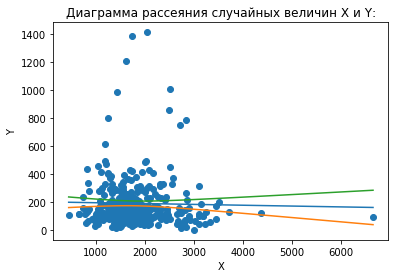

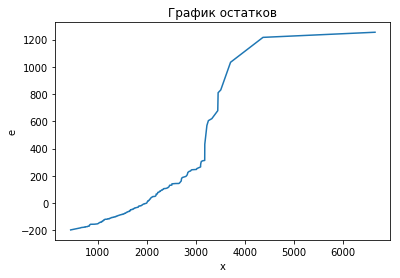

In [65]:
# г),д)

fig, ax0 = plt.subplots(1,1)
fig, ax1 = plt.subplots(1,1)

x_linspace = np.linspace(x.data().min(), x.data().max(), 100)
y_values = [
    reg_func(a) for a in x_linspace
]
y_values_min = [
    reg_func(a)-t01*np.sqrt(Dn_o)*np.sqrt(1/n + (a-x.mean())**2/(n*x.var())) for a in x_linspace
]
y_values_max = [
    reg_func(a)+t01*np.sqrt(Dn_o)*np.sqrt(1/n + (a-x.mean())**2/(n*x.var())) for a in x_linspace
]


ax0.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')

ax0.scatter(x.data(), y.data())
ax0.plot(x_linspace, y_values, label='f(x)')
ax0.plot(x_linspace, y_values_min, label='f_min(x)')
ax0.plot(x_linspace, y_values_max, label='f_max(x)')

e_func = lambda x, y: y - reg_func(x)

pairs = [
    [x.data()[i], y.data()[i]] for i in range(x.n())
]
pairs = np.array(pairs)
pairs = np.sort(pairs, 0)

e_values = [
    e_func((pairs[i][0]), (pairs[i][1])) for i in range(len(pairs))
]

x_sorted = np.sort(x.data())

ax1.set_title('График остатков')
ax1.set_xlabel('x')
ax1.set_ylabel('e')
ax1.plot(x_sorted, e_values, label='e(x)')

In [66]:
# 9.1.3
# a),б)


# закон распределения : F(1, n-2)
# x(1-alpha) , x - квантиль F(1, n-2) - крит точка
# 1-F(Z), F-функция распределения
# b1=0 - H0

Z = D_r/(D_o/(n-2))
p = right_p_value(stats.f(1, n-2), Z)

print (Z, p)

alpha = [0.01, 0.05, 0.1]
for a in alpha :
    print (decision(a,p))

0.15443177398848218 0.6946031791352819
H0
H0
H0


## 9.2 Линейная регрессионная модель общего вида

In [68]:
TASK_9_2 = ['C6', 'C13']
X = np.array(df[TASK_9_2[0]])
Y = np.array(df[TASK_9_2[1]])
x = Sample.from_data("x", X)
y = Sample.from_data("y", Y)

In [69]:
# 9.2.1
# а), б)

#f(x) = b0 + b1*x + b2*x**2
#b_j = (sum_i(1, n)(y_i * f_j(x_i)))/(sum_i(1, n)(f_j^2(x_i)))

def coef_sqr_reg(func_j):
    s_upper = 0
    s_lower = 0
    for i in range (y.n()):
        s_upper += y.data()[i]*func_j(x.data()[i])
        s_lower += (func_j(x.data()[i]))**2
    return float(s_upper)/s_lower

f0 = lambda x : 1
f1 = lambda x : x
f2 = lambda x : x**2

b0 = coef_sqr_reg(f0)
b1 = coef_sqr_reg(f1)
b2 = coef_sqr_reg(f2)

print ("b0:",b0," | b1:",b1," | b2:",b2)


b0: 189.8920634920635  | b1: 0.09172684811316871  | b2: 2.6312332993277536e-05


In [70]:
a0 = np.ones((len(X), 1))
a1 = np.expand_dims(X ,axis=0)
a2 = np.expand_dims(X**2 ,axis=0)
A = np.concatenate((a0, a1.T, a2.T), axis=1)
Y1 = np.expand_dims(Y, axis=0).T
beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y1)
beta
b0 = beta[0, 0]
b1 = beta[1, 0]
b2 = beta[2, 0]
b0 , b1, b2

(156.53132228118244, 0.037071021822301715, -9.010501022101325e-06)

In [71]:
# в), г)
reg_func = lambda x: b0 + b1*x + b2*x**2
k = 3
n = y.n()

D_y = 0
for i in range(y.n()) :
    D_y += (y.data()[i] - y.mean())**2
D_y = float(D_y)/y.n()



D_r = 0
for i in range(y.n()) :
    D_r += (reg_func(x.data()[i]) - y.mean())**2
D_r = float(D_r)/y.n()

D_o = 0
for i in range(y.n()) :
    D_o += (y.data()[i] - reg_func(x.data()[i]))**2
D_o = float(D_o)/y.n()

Fn_r = k-1
Fn_o = n-k
Fn_y = n-1

Dn_r = (n/(k-1)) * D_r
Dn_o = (n/(n-k)) * D_o
Dn_y = (n/(n-1)) * D_y

table(
    ['Источник вариации', 'Показатель вариации', 'Число степеней свободы', 'Несмещённая оценка'],
    [
        ['Факторный признак', D_r, Fn_r, Dn_r],
        ['Остаточные признаки', D_o, Fn_o, Dn_o],
        ['Все признаки', D_y, Fn_y, Dn_y]
    ]
)

sqr_linear_var = [D_r, D_o, D_y]

print ("D_регрессионная:",D_r,"| D_остаточная:",D_o,"| D_общая:",D_y,"| D_регрессионная + D_остаточная:",D_r+D_o,)
print ("могут не совпадать т.к. нет функциональной зависимости")

Источник вариации,Показатель вариации,Число степеней свободы,Несмещённая оценка
Факторный признак,136.46102080305195,2,21492.610776480684
Остаточные признаки,33246.517805097676,312,33566.19586091592
Все признаки,33382.97882590072,314,33489.29404509149


D_регрессионная: 136.46102080305195 | D_остаточная: 33246.517805097676 | D_общая: 33382.97882590072 | D_регрессионная + D_остаточная: 33382.978825900725
могут не совпадать т.к. нет функциональной зависимости


In [72]:
# д)

R_2 = D_r/D_y
R = np.sqrt(D_r/D_y)

print ("коэффициент детерминации: R^2 = Dрегр/Dобщ =",R_2)
print ("корреляционное отношение: R =",R)

коэффициент детерминации: R^2 = Dрегр/Dобщ = 0.004087742484417733
корреляционное отношение: R = 0.06393545561281105


In [73]:
# 9.2.2
# a)

print ("f(x) +- t(1-alpha/2, n-k)*sqrt(D_ост_несм)*sqrt(f_T(x)*(F_T*F)^-1*f(x))\n здесь f(x)=(f0(x),f1(x),...)_T - столбец хначений фуенкций в х, F - регрессионная матрица")

f(x) +- t(1-alpha/2, n-k)*sqrt(D_ост_несм)*sqrt(f_T(x)*(F_T*F)^-1*f(x))
 здесь f(x)=(f0(x),f1(x),...)_T - столбец хначений фуенкций в х, F - регрессионная матрица


156.60542828282294


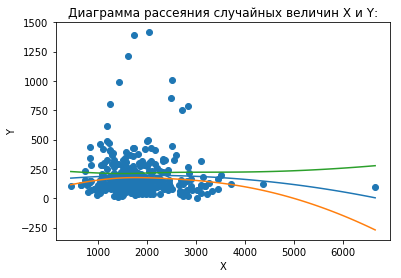

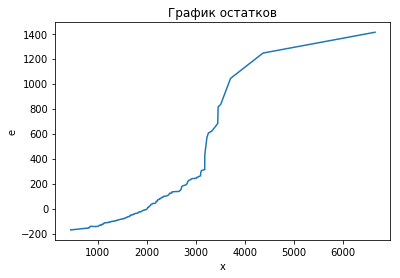

In [76]:
# б), в)
from numpy import linalg

f_row = lambda x : np.array([f0(x), f1(x), f2(x)]) 
f_column = lambda x : (f_row(x)).transpose()  

F = [
    f_row(val) for val in x.data()
]

F = np.array(F)

fig, ax0 = plt.subplots(1,1)
fig, ax1 = plt.subplots(1,1)

x_linspace = np.linspace(x.data().min(), x.data().max(), 100)
y_values = [
    reg_func(a) for a in x_linspace
]
y_values_min = [
    reg_func(a)-stats.t(n-k).ppf(1-0.1/2)*np.sqrt(Dn_o)*np.sqrt(np.dot(np.dot(f_row(a),linalg.inv(np.dot(F.transpose(),F))),f_column(a))) for a in x_linspace
]
y_values_max = [
    reg_func(a)+stats.t(n-k).ppf(1-0.1/2)*np.sqrt(Dn_o)*np.sqrt(np.dot(np.dot(f_row(a),linalg.inv(np.dot(F.transpose(),F))),f_column(a))) for a in x_linspace
]

x_linspace = np.linspace(x.data().min(), x.data().max(), 100)
ax0.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')

print(reg_func(2))
ax0.scatter(x.data(), y.data())
ax0.plot(x_linspace, y_values, label='f(x)')
ax0.plot(x_linspace, y_values_min, label='f_min(x)')
ax0.plot(x_linspace, y_values_max, label='f_max(x)')

e_func = lambda x, y: y - reg_func(x)

pairs = [
    [x.data()[i], y.data()[i]] for i in range(x.n())
]
pairs = np.array(pairs)
pairs = np.sort(pairs, 0)

e_values = [
    e_func((pairs[i][0]), (pairs[i][1])) for i in range(len(pairs))
]

x_sorted = np.sort(x.data())

ax1.set_title('График остатков')
ax1.set_xlabel('x')
ax1.set_ylabel('e')
ax1.plot(x_sorted, e_values, label='e(x)')
